<a href="https://www.kaggle.com/code/akibmir/yelp-business-review-nlp-classification-task?scriptVersionId=106463472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 **NATURAL LANGUAGE PROCESSING**

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.
The dataset which we will be using is a popular dataset with the name yelp. 
ach observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below.

**Importing Basic Libararies**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import Data**

In [2]:
yelp = pd.read_csv('../input/yelp-business-reviews-dataset/yelp.csv')

Checking the Head, Info and Description of the Data

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Let us Create a new column "text length" which will contain number of words in the text column.

In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


**Let us move towards Exploratory Data Analysis**

Set style for seaborn library visulaisation.

In [8]:
sns.set_style('white')

*Create a grid of histograms of text length based off of the star ratings.*

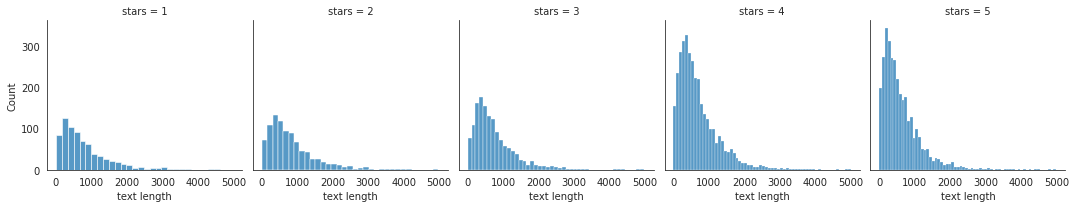

In [9]:
g = sns.FacetGrid(yelp, col="stars")
g.map_dataframe(sns.histplot, x="text length")

Boxplot of text length for each star catagory 

<AxesSubplot:xlabel='stars', ylabel='text length'>

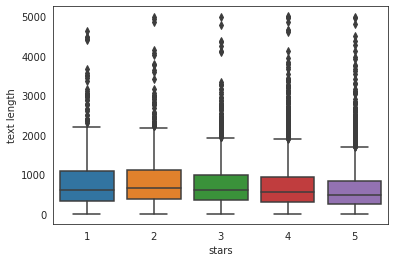

In [10]:
sns.boxplot(x = 'stars', y = 'text length', data = yelp)

Creating Countplot with respect to star ratings.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stars', ylabel='count'>

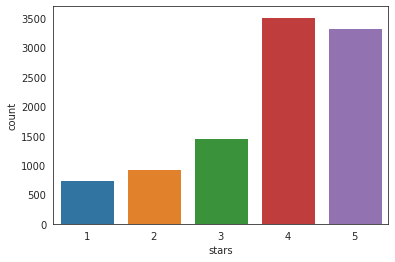

In [11]:
sns.countplot(yelp['stars'])

To get the mean values of the numerical columns, we would use groupby function.

In [12]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Correlation

In [13]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


Heatmap of above correlation table

<AxesSubplot:>

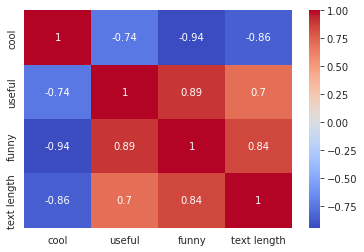

In [14]:
sns.heatmap(yelp.groupby('stars').mean().corr(), cmap = 'coolwarm', annot = True)

**Now coming to Natural Language Process Classification Predictive Analysis**

Creating a dataframe called yelp_cl that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [15]:
yelp_cl = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

Info about the above data:

In [16]:
yelp_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


For model training and Testing, we need to make a seperate dataframe for input x and output y variable.
 Here x is the text column and y is the star column.

In [17]:
x = yelp_cl['text']
y = yelp_cl['stars']

In [18]:
x.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object

In [19]:
y.head()

0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64

**Importing CountVectorizer and create a CountVectorizer object.**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x)

**Train Test Split**

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,  random_state = 101)

**Training a Model**

Importing MultinomialNB

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

**Prediction and Performance Evaluation**

In [23]:
predictions =  classifier.predict(x_test)

Use confusion matric and classification report to check the performance of Naive Bayes Algorithm.

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.86      0.76      0.81       150
           5       0.95      0.97      0.96       668

    accuracy                           0.93       818
   macro avg       0.91      0.87      0.88       818
weighted avg       0.93      0.93      0.93       818



*We can see the MultinomialNB has produces 93% accuracy, recall and f1-score respectively.*

In [26]:
print(confusion_matrix(y_test, predictions))

[[114  36]
 [ 18 650]]


<AxesSubplot:>

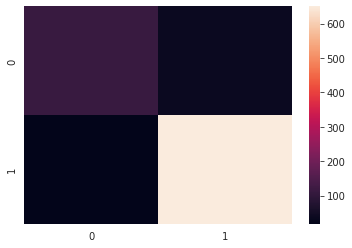

In [27]:
sns.heatmap(confusion_matrix(y_test, predictions))

What if we try to include Term Frequency and Inverse Document Frequency.
Let us see.

Import TfdifTransformer and Pipeline from sklearn

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.pipeline import Pipeline

Now create a pipeline with the following steps:

In [29]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('model', MultinomialNB())
])

**Using the Pipeline**


We will need to split the data again.

In [30]:
x = yelp_cl['text']
y = yelp_cl['stars']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,  random_state = 101)

Fit the pipeline to the training data and predict the results

In [32]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [33]:
prd = pipeline.predict(x_test)

After using pipeline, let us see the evaluation metrics.


Classification Report and Confusion Matrix

In [34]:
print(classification_report(y_test, prd))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       150
           5       0.82      1.00      0.90       668

    accuracy                           0.82       818
   macro avg       0.41      0.50      0.45       818
weighted avg       0.67      0.82      0.73       818



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


OH! It performed worse than before.

In [35]:
print(confusion_matrix(y_test, prd))

[[  0 150]
 [  0 668]]


**Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with.**

> THANK YOU